In [ ]:
# @author - Nikhil Bambhroliya

# Hierarchical Clustering on IRIS Dataset

In [50]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn import datasets

import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [51]:
iris=datasets.load_iris()
iris
x=iris.data
y=iris.target
print(x.shape)
# x, y = make_blobs(n_samples=100, centers=3, cluster_std=1.00)

f1=iris.data[:,:1]
f2=iris.data[:,1:2]

# f2=np.reshape(f2, (len(f2),1))
# print(f2)
x=np.concatenate((f1,f2),axis=1)

print("\nIris Data = \n", iris.data[:5])
print("\nx = \n", x[:5])
print("\ny = \n", y[:5])

(150, 4)

Iris Data = 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

x = 
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

y = 
 [0 0 0 0 0]


### Plot Data Points on 2D Plane

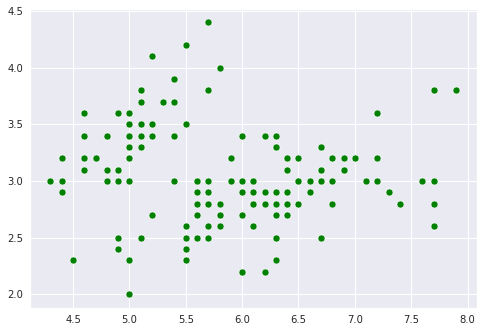

In [52]:
sns.scatterplot(x=x[:, 0], y=x[:, 1], c=['green'])

### Visulize by Dendrogram

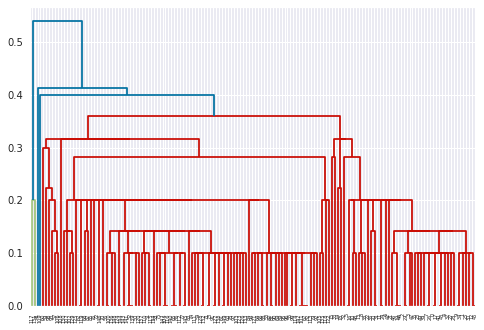

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(x, 'single'),
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

### Find Clusters using Elbow Method

In [54]:
# !pip install yellowbrick

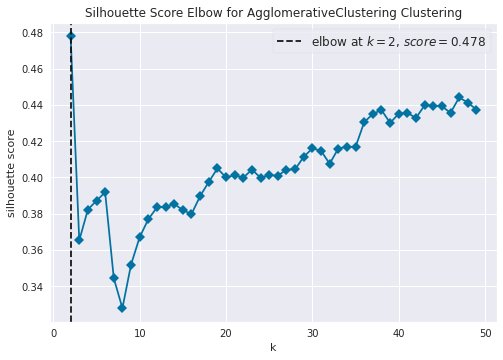

In [55]:
# Import the KElbowVisualizer method
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn Hierarchical model
model = AgglomerativeClustering()
# model=KMeans()

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visulizer = KElbowVisualizer(model, k=(2,50), metric='silhouette', timings=False)

# Fit the data and visualize
visulizer.fit(x)
visulizer.poof()

### Create Hierarchical Cluster and Predict x using Clusers=2

In [56]:
from sklearn.cluster import AgglomerativeClustering

hc_model = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage='ward')
hc_model.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
# Get the cluster labels
hc_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Use KMeans Clustering for find cetroids

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)

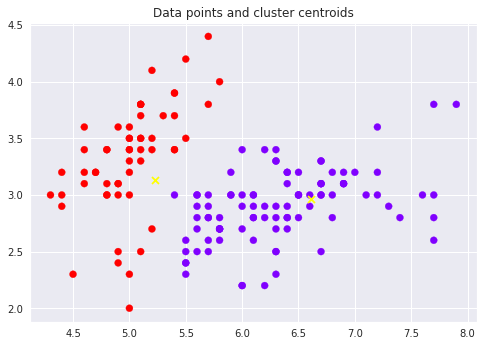

In [59]:
# print the data points
plt.scatter(x=x[:,0], y=x[:,1], c=hc_model.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1],
            c='yellow', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [60]:
 # Calculate silhouette_score
from sklearn.metrics import silhouette_score
# print(silhouette_score(x, kmeans.labels_))
print("Silhouette Score = ", silhouette_score(x, hc_model.labels_))

Silhouette Score =  0.47767996898758924
